### Import libraries

In [2]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd

import time
from requests import Session
import sys # if the path is not present in sys.path, use sys.path.insert to include the directory
import re

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib as mpl
from pylab import rcParams
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_theme(style='white')
#% matplotlib inline
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

import string
import gensim
import collections
from gensim.corpora import Dictionary
import difflib 
from matplotlib_venn import venn3
from venn import venn

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

from autocorrect import Speller
from itertools import combinations
from nltk import skipgrams

from bs4 import BeautifulSoup
import requests
import csv
import time

import itertools
import collections
import re
import networkx as nx
from itertools import chain

import re
import string
import gc
import warnings
warnings.filterwarnings('ignore')

import config

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


```requests``` is a package that is going to help us communicate between our browser and a web server somewhere that is storing data we are interested in.

### Make a GET request from the API endpoint which Semantic Scholar provided

In [3]:
api_key = config.semantic_api_key

headers = {
        'Content-type': 'application/json',
        'x-api-key': api_key
    }

query = 'online sexism misogyny' # searching keywords on misogyny and sexism
fields='url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles'
years = '2012-2022'
offset = 0

In [4]:
responses = requests.get(f'https://api.semanticscholar.org/graph/v1/paper/search?query={query}&fields={fields}&year={years}&offset={offset}&limit=100', headers=headers, stream = True)

In [5]:
responses

<Response [200]>

What does ```<Response [200]>``` mean? Just that the request has succeeded.<br>

We need to extract some data from this request. Because this request contains more than just the response code shown.

### Extract data from the request using the json() method
json() to extract the json-structured data from the request

In [6]:
json = responses.json()

### Exploring our JSON using the keys() and type() methods

In [7]:
json.keys()

dict_keys(['total', 'offset', 'next', 'data'])

In [8]:
json['total'] # This is the number of search results we got
# Depending this, we set the range for the for loop

1192

In [9]:
json['data'][0] 
# Just check with one of the values to see what fields we get and if we need all of them.
# We do not need to see all of them as the list will go to the value we get in the previous cell.

{'paperId': '72264aad76e77f3034e998609309f5105f18e3a4',
 'url': 'https://www.semanticscholar.org/paper/72264aad76e77f3034e998609309f5105f18e3a4',
 'title': 'Online Hate Speech against Women: Automatic Identification of Misogyny and Sexism on Twitter',
 'abstract': None,
 'venue': 'Journal of Intelligent & Fuzzy Systems',
 'year': 2019,
 'referenceCount': 21,
 'citationCount': 75,
 'influentialCitationCount': 6,
 'isOpenAccess': True,
 'openAccessPdf': {'url': 'https://riunet.upv.es/bitstream/10251/158846/2/JIFS179023_author_v2.pdf',
  'status': 'GREEN'},
 'fieldsOfStudy': ['Computer Science', 'Psychology'],
 's2FieldsOfStudy': [{'category': 'Computer Science', 'source': 'external'},
  {'category': 'Psychology', 'source': 'external'}],
 'citationStyles': {'bibtex': '@Article{Frenda2019OnlineHS,\n author = {Simona Frenda and Bilal Ghanem and M. Montes-y-Gómez and Paolo Rosso},\n booktitle = {Journal of Intelligent & Fuzzy Systems},\n journal = {J. Intell. Fuzzy Syst.},\n pages = {4743-47

In [12]:
type(json['data'][0]) # See the type for this key

dict

We see that this is a dictionary. This is definitely transformable into a Dataframe.

### JSON to DataFrame

In [10]:
df = pd.DataFrame(json['data'])
df

,paperId,url,title,abstract,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles,authors
0,72264aad76e77f3034e998609309f5105f18e3a4,https://www.semanticscholar.org/paper/72264aad...,Online Hate Speech against Women: Automatic Id...,None,Journal of Intelligent & Fuzzy Systems,2019,21,75,6,True,{'url': 'https://riunet.upv.es/bitstream/10251...,"[Computer Science, Psychology]","[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Article{Frenda2019OnlineHS, auth...","[{'authorId': '7675229', 'name': 'Simona Frend..."
1,ab37d045dc0535d1d5940e3112889a5791ab3879,https://www.semanticscholar.org/paper/ab37d045...,"Discrimination, Misogyny and Harassment: Examp...",Open Source Software (OSS) communities are not...,2022 IEEE/ACM 3rd International Workshop on Ge...,2022,31,1,0,True,{'url': 'https://dl.acm.org/doi/pdf/10.1145/35...,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Book{Singh2022DiscriminationMA, ...","[{'authorId': '107736176', 'name': 'Vandana Si..."
2,7794bd469571b72f4f78492edb00541d8b97e8a3,https://www.semanticscholar.org/paper/7794bd46...,"Othering Political Women: Online Misogyny, Rac...",None,Online Othering,2019,40,11,1,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...","{'bibtex': '@Article{Southern2019OtheringPW, ...","[{'authorId': '29142655', 'name': 'Rosalynd So..."
3,a9aacc8d3777d265cc016181fa638615e176a389,https://www.semanticscholar.org/paper/a9aacc8d...,Disrupting Sexism and Sexualities Online? Gend...,None,The Geographies of Digital Sexuality,2019,55,2,0,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...","{'bibtex': '@Article{McLean2019DisruptingSA, ...","[{'authorId': '40486904', 'name': 'J. McLean'}..."
4,9b4ff44af72712a0a0201e8dcd476653b3404515,https://www.semanticscholar.org/paper/9b4ff44a...,"Reinforcing Sexism and Misogyny: Social Media,...","This paper demonstrates, through content analy...",,2018,45,10,0,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...","{'bibtex': '@Article{Barratt2018ReinforcingSA,...","[{'authorId': '113305600', 'name': 'S. Barratt'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1da5e57e316f81813566c7e3bc942a87c6c97ad6,https://www.semanticscholar.org/paper/1da5e57e...,Adolescents’ Experiences and Coping with Sexis...,None,Sex Roles,2019,50,0,0,False,None,None,"[{'category': 'Psychology', 'source': 's2-fos-...","{'bibtex': '@Article{Choe2019AdolescentsEA, a...","[{'authorId': '12133473', 'name': 'Kwisoon Cho..."
96,746eb36927418203539644761b7470394b8486cd,https://www.semanticscholar.org/paper/746eb369...,“Feminist_brevity_in_light_of_masculine_long-w...,Abstract C+= (pronounced “C plus equality” or ...,,2018,34,11,0,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...",{'bibtex': '@Article{Easter2018Feministbrevity...,"[{'authorId': '113000742', 'name': 'Brandee Ea..."
97,315dcbe46382d846a79a736e45fdb16eb4200cf6,https://www.semanticscholar.org/paper/315dcbe4...,“Playing the gender card”: Media representatio...,What is at stake for women who challenge sexis...,,2016,67,35,0,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...","{'bibtex': '@Article{Worth2016PlayingTG, auth...","[{'authorId': '119384741', 'name': 'A. Worth'}..."
98,824c3c4c192e41ed1102413c12c4a1fc8d19c639,https://www.semanticscholar.org/paper/824c3c4c...,Assessing online misogyny: Perspectives from s...,None,,2018,37,28,2,False,None,[Sociology],"[{'category': 'Sociology', 'source': 'external...","{'bibtex': '@Article{Moloney2018AssessingOM, ...","[{'authorId': '10323483', 'name': 'M. Moloney'..."


In [11]:
df.columns

Index(['paperId', 'url', 'title', 'abstract', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy',
       'citationStyles', 'authors'],
      dtype='object')

In [12]:
# Check if the abstracts are incomplete or not
df['abstract'][1]

"Open Source Software (OSS) communities are notorious for discrimination and hostility towards women and currently, only 23 percent of OSS developers are women. Despite that, less than five percent of the online communities have “safe spaces” focused on supporting women. In this article, we present the results of our in-depth study of these women-focused spaces. These spaces exist to provide a common forum for discussion, support, empowerment, and engagement of minorities in OSS. Our analysis focuses on the messages related to sexism and discrimination experiences as posted on these discussion forums by women of OSS. The results demonstrate examples of harassment, the support that these spaces provide, and the impact of the discrimination on the presence of women in OSS in general. We conclude with recommendations for OSS community organizers for creating a friendly, equitable environment for women in OSS. ACM Reference format: Vandana Singh and William Brandon. 2022. Discrimination, M

In [13]:
len(df)

100

Since the limit is only 100, we <b>cannot</b> extract the whole data all at once. To do that, we need to create a for loop. 

Since we know that for each GET request, we get 100 manuscripts. And the total number of files we got from ```json[total]``` shows that we might need 190 iterations. So we would be putting all that into the while loop and get the data until either of the following conditions: <br>
- The sum of <b>limit</b> and <b>offset</b> value does not exceed 10,000
- There's no data in the dictionary file of the json. Which means that there's no more value left to return

In [14]:
api_key = config.semantic_api_key

headers = {
        'Content-type': 'application/json',
        'x-api-key': api_key
    }
    
#query = 'online sexism misogyny' # searching keywords on misogyny and sexism
#query = 'online+sexism online+misogyny'
#query = '(misogyny OR sexism) AND (detection OR identification OR prediction OR classification)'
#query = '%28misogyny%20OR%20sexism%29%20%20AND%20%28detection%20OR%20identification%20OR%20prediction%20OR%20classification%29'
#query = 'sexism+detection sexism+identification sexism+prediction sexism+classification misogyny+detection misogyny+identification misogyny+prediction misogyny+classification'
#query = '{"query_string": {"query": "(misogyny OR sexism) AND (detection OR identification OR prediction OR classification)","default_field": "content"}'
#query = '%28misogyny+OR+sexism+AND+detection+OR+identification+OR+prediction+OR+classification%29'

query = '%28misogyny%20OR%20sexism%20OR%20gender%20discrimination%29%20AND%20%28detection%20OR%20identification%20OR%20prediction%20OR%20classification%29'
offset = 0
years = '2012-2022'

url = 'https://api.semanticscholar.org/graph/v1/paper/search?query={query}&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles'

In [15]:
json_data = []
offset = 0
limit= 100

while True: # As long as the url exists
    # print('Requesting', url)
    # print('Offset', offset)
    # Make the request
    responses = requests.get(f'{url}&year={years}&offset={offset}&limit={limit}', headers=headers, stream = True)
    json = responses.json()
    # Check if the sum of offset and limit exceeds 10000 or if any values are left
    # To avoid {'error': 'offset + limit must be < 10000'} Why? Check the About.md for answers
    if offset+limit >= 10000 or len(json['data']) == 0: 
        break
    else:
        offset = offset + 100
    # Checking if any values are left
    #if len(json['data']) == 0:
        # If not, exit the loop
    #    break
    # If data found, add them to the variable, 
    # add them to the list and move to the next offset
    json_data.extend(json['data'])

In [16]:
df = pd.DataFrame(json_data)
df['index'] = df.index
df

,paperId,url,title,abstract,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles,authors,index
0,b4ce19f3b3819accb160acffabffa849f18f4758,https://www.semanticscholar.org/paper/b4ce19f3...,Anchor DETR: Query Design for Transformer-Base...,"In this paper, we propose a novel query design...",AAAI Conference on Artificial Intelligence,2022,25,110,23,True,{'url': 'https://ojs.aaai.org/index.php/AAAI/a...,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Article{Wang2022AnchorDQ, author...","[{'authorId': '2107945710', 'name': 'Yingming ...",0
1,aa28873534c24e4a8c5deb7bff723cd5fc69a6f0,https://www.semanticscholar.org/paper/aa288735...,QMSum: A New Benchmark for Query-based Multi-d...,Meetings are a key component of human collabor...,North American Chapter of the Association for ...,2021,65,115,27,True,{'url': 'https://aclanthology.org/2021.naacl-m...,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Article{Zhong2021QMSumAN, author...","[{'authorId': '1606040932', 'name': 'Ming Zhon...",1
2,8733fe2371b615609b04e2e910b1ecfa8e77cbc2,https://www.semanticscholar.org/paper/8733fe23...,Square Attack: a query-efficient black-box adv...,None,European Conference on Computer Vision,2019,65,501,104,True,"{'url': 'http://arxiv.org/pdf/1912.00049', 'st...","[Computer Science, Mathematics]","[{'category': 'Computer Science', 'source': 'e...",{'bibtex': '@Article{Andriushchenko2019SquareA...,"[{'authorId': '47669224', 'name': 'Maksym Andr...",2
3,367a5169efb790a15bcc1afcb0164b32740b751a,https://www.semanticscholar.org/paper/367a5169...,Vision-Language Transformer and Query Generati...,"In this work, we address the challenging task ...",IEEE International Conference on Computer Vision,2021,90,76,15,True,"{'url': 'http://arxiv.org/pdf/2210.15871', 'st...","[Computer Science, Medicine]","[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Article{Ding2021VisionLanguageTA,...","[{'authorId': '49441320', 'name': 'Henghui Din...",3
4,493d5f344eea1468260946b29a80dc81b2be409c,https://www.semanticscholar.org/paper/493d5f34...,HopSkipJumpAttack: A Query-Efficient Decision-...,The goal of a decision-based adversarial attac...,IEEE Symposium on Security and Privacy,2019,46,368,88,True,{'url': 'https://ieeexplore.ieee.org/ielx7/914...,"[Computer Science, Mathematics]","[{'category': 'Computer Science', 'source': 'e...",{'bibtex': '@Article{Chen2019HopSkipJumpAttack...,"[{'authorId': '144626708', 'name': 'Jianbo Che...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,578f7c003de822fbafaaf82f0dc1c5cf8ed92a14,https://www.semanticscholar.org/paper/578f7c00...,Hadoop-GIS : A High Performance Spatial Query ...,Querying and analyzing large volumes of spatia...,,2012,31,9,1,False,None,None,"[{'category': 'Computer Science', 'source': 's...","{'bibtex': '@Inproceedings{Wang2012HadoopGISA,...","[{'authorId': '143924592', 'name': 'Fusheng Wa...",9895
9896,294470d533b54694b5b6cbfa0bd9abb658a2004a,https://www.semanticscholar.org/paper/294470d5...,A Gaussian process-based RRT planner for the e...,A new framework which adopts a rapidly-explori...,Adv. Robotics,2013,20,107,3,False,None,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Article{Yang2013AGP, author = {K...","[{'authorId': '40302277', 'name': 'Kwangjin Ya...",9896
9897,d5fc3948f14f3e73318b354d678e3bade558a886,https://www.semanticscholar.org/paper/d5fc3948...,Enforcing k nearest neighbor query integrity o...,"Outsourcing spatial databases, including both ...",SIGSPATIAL/GIS,2012,12,11,1,False,None,[Computer Science],"[{'category': 'Computer Science', 'source': 'e...","{'bibtex': '@Book{Hu2012EnforcingKN, author =...","[{'authorId': '2118848305', 'name': 'Ling Hu'}...",9897
9898,7f3ca781df27b6c271a984aa8881a1f4ee9801a8,https://www.semanticscholar.org/paper/7f3ca781...,Query-based access con

In [17]:
df.columns

Index(['paperId', 'url', 'title', 'abstract', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy',
       'citationStyles', 'authors', 'index'],
      dtype='object')

In [18]:
df.title

0       Anchor DETR: Query Design for Transformer-Base...
1       QMSum: A New Benchmark for Query-based Multi-d...
2       Square Attack: a query-efficient black-box adv...
3       Vision-Language Transformer and Query Generati...
4       HopSkipJumpAttack: A Query-Efficient Decision-...
                              ...                        
9895    Hadoop-GIS : A High Performance Spatial Query ...
9896    A Gaussian process-based RRT planner for the e...
9897    Enforcing k nearest neighbor query integrity o...
9898    Query-based access control for secure collabor...
9899    MovieMine: personalized movie content search b...
Name: title, Length: 9900, dtype: object

In [19]:
df['title'].iloc[0]

'Anchor DETR: Query Design for Transformer-Based Detector'

##### Check how many of them are Open Access

In [22]:
len(df[df.isOpenAccess==True]), len(df)

(4275, 9900)

This gives us an idea of how much percent of the data is Open Access, which is pretty low. This could say a lot about how open the research on the topics of misogyny and sexism has been, and thus impacting on their propagation.

### Authors

In [23]:
df['authors']

0       [{'authorId': '2107945710', 'name': 'Yingming ...
1       [{'authorId': '1606040932', 'name': 'Ming Zhon...
2       [{'authorId': '47669224', 'name': 'Maksym Andr...
3       [{'authorId': '49441320', 'name': 'Henghui Din...
4       [{'authorId': '144626708', 'name': 'Jianbo Che...
                              ...                        
9895    [{'authorId': '143924592', 'name': 'Fusheng Wa...
9896    [{'authorId': '40302277', 'name': 'Kwangjin Ya...
9897    [{'authorId': '2118848305', 'name': 'Ling Hu'}...
9898    [{'authorId': '1709074', 'name': 'Gábor Bergma...
9899    [{'authorId': '2109608195', 'name': 'Hyung W. ...
Name: authors, Length: 9900, dtype: object

In [24]:
df['authors'][1]

[{'authorId': '1606040932', 'name': 'Ming Zhong'},
 {'authorId': '144508458', 'name': 'Da Yin'},
 {'authorId': '48881008', 'name': 'Tao Yu'},
 {'authorId': '2056402211', 'name': 'A. Zaidi'},
 {'authorId': '2074120594', 'name': 'Mutethia Mutuma'},
 {'authorId': '144598922', 'name': 'Rahul Jha'},
 {'authorId': '2072795428', 'name': 'A. Awadallah'},
 {'authorId': '1709797', 'name': 'Asli Celikyilmaz'},
 {'authorId': '39798499', 'name': 'Yang Liu'},
 {'authorId': '1767521', 'name': 'Xipeng Qiu'},
 {'authorId': '9215251', 'name': 'Dragomir R. Radev'}]

In [25]:
authors = pd.json_normalize(df['authors'])
authors

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,"{'authorId': '2107945710', 'name': 'Yingming W...","{'authorId': '1771551', 'name': 'X. Zhang'}","{'authorId': '2109350833', 'name': 'Tong Yang'}","{'authorId': '2032184078', 'name': 'Jian Sun'}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'authorId': '1606040932', 'name': 'Ming Zhong'}","{'authorId': '144508458', 'name': 'Da Yin'}","{'authorId': '48881008', 'name': 'Tao Yu'}","{'authorId': '2056402211', 'name': 'A. Zaidi'}","{'authorId': '2074120594', 'name': 'Mutethia M...","{'authorId': '144598922', 'name': 'Rahul Jha'}","{'authorId': '2072795428', 'name': 'A. Awadall...","{'authorId': '1709797', 'name': 'Asli Celikyil...","{'authorId': '39798499', 'name': 'Yang Liu'}","{'authorId': '1767521', 'name': 'Xipeng Qiu'}",...,None,None,None,None,None,None,None,None,None,None
2,"{'authorId': '47669224', 'name': 'Maksym Andri...","{'authorId': '39171784', 'name': 'Francesco Cr...","{'authorId': '2874440', 'name': 'Nicolas Flamm...","{'authorId': '143610806', 'name': 'Matthias He...",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"{'authorId': '49441320', 'name': 'Henghui Ding'}","{'authorId': '2118485386', 'name': 'Chang Liu'}","{'authorId': '35412344', 'name': 'Suchen Wang'}","{'authorId': '3307580', 'name': 'Xudong Jiang'}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'authorId': '144626708', 'name': 'Jianbo Chen'}","{'authorId': '1694621', 'name': 'Michael I. Jo...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,"{'authorId': '143924592', 'name': 'Fusheng Wang'}","{'authorId': '1684441', 'name': 'Ablimit Aji'}","{'authorId': '50383982', 'name': 'Qiaoling Liu'}","{'authorId': '46934873', 'name': 'J. Saltz'}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9896,"{'authorId': '40302277', 'name': 'Kwangjin Yang'}","{'authorId': '2597431', 'name': 'Seng Keat Gan'}","{'authorId': '1800730', 'name': 'S. Sukkarieh'}",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9897,"{'authorId': '2118848305', 'name': 'Ling Hu'}","{'authorId': '3261435', 'name': 'Yinan Jing'}","{'authorId': '1758909', 'name': 'Wei-Shinn Ku'}","{'authorId': '1773086', 'name': 'C. Shahabi'}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9898,"{'authorId': '1709074', 'name': 'Gábor Bergmann'}","{'authorId': '2062769', 'name': 'Csaba Debrece...","{'authorId': '1682971', 'name': 'I. Ráth'}","{'authorId': '71971228', 'name': 'Dániel Varró'}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [26]:
authors[0].isna().sum() # Interesting that 2 manuscripts do not have any first author

2

Check which index rows have empty first author.

In [27]:
authors[authors[0].isna()].index.tolist()

[5699, 5705]

Now check with these indices in the original dataframe.

In [28]:
#df.iloc[5386]

In [29]:
df.iloc[5412]

paperId                              e52d269ba98118a9424fb52d61e5c01398d415c1
url                         https://www.semanticscholar.org/paper/e52d269b...
title                              Norn: An SMT Solver for String Constraints
abstract                                                                 None
venue                       International Conference on Computer Aided Ver...
year                                                                     2015
referenceCount                                                             18
citationCount                                                              83
influentialCitationCount                                                   12
isOpenAccess                                                             True
openAccessPdf               {'url': 'https://link.springer.com/content/pdf...
fieldsOfStudy                                              [Computer Science]
s2FieldsOfStudy             [{'category': 'Computer Science', 's

Looks like the same manuscript (in one of the previous runs). But this proves that the dataframe has duplicate values. Remove them before further investigation.

In [32]:
print("Number of null values in authors: \n First author: {first}\n Second author: {second} \n Third author: {third} \n Fourth author: {fourth}\n Fifth author: {fifth}\n Sixth author: {sixth}".format(first=authors[0].isna().sum(), second= authors[1].isna().sum(), third= authors[2].isna().sum(), fourth= authors[3].isna().sum(), fifth= authors[4].isna().sum(), sixth= authors[5].isna().sum()))

Number of null values in authors: 
 First author: 2
 Second author: 422 
 Third author: 2135 
 Fourth author: 4608
 Fifth author: 6717
 Sixth author: 8106


### Separate the authors' name and id from the dictionary

In [33]:
nested_authors1 = pd.json_normalize(authors[0]).rename(columns={'authorId':'author_1_id', 'name':'author_1_name'})
nested_authors1['index'] = nested_authors1.index
nested_authors1

,author_1_id,author_1_name,index
0,2107945710,Yingming Wang,0
1,1606040932,Ming Zhong,1
2,47669224,Maksym Andriushchenko,2
3,49441320,Henghui Ding,3
4,144626708,Jianbo Chen,4
...,...,...,...
9895,143924592,Fusheng Wang,9895
9896,40302277,Kwangjin Yang,9896
9897,2118848305,Ling Hu,9897
9898,1709074,Gábor Bergmann,9898


Let's check if the combinations are unique to each author. (Can also check with the sizes)

This result could be useful later as well, for analysis.

In [34]:
# to get unique combinations of the authors and names
nested_authors1_comb = nested_authors1.groupby(['author_1_id','author_1_name']).size().reset_index().rename(columns={0:'count'})
nested_authors1_comb = nested_authors1_comb.sort_values(by='count', ascending=False)
nested_authors1_comb

,author_1_id,author_1_name,count
1657,1764889,Meghyn Bienvenu,23
591,144502903,W. Fan,15
4785,35106192,P. Barceló,13
630,144658846,M. Arenas,13
358,143750022,T. Kumar,13
...,...,...,...
2496,2091174,Pin Jiang,1
2494,2090521,D. Glowacka,1
2493,2090389836,Hao Ren,1
2492,2089551047,Mohit Jain,1


Now, use dictionary to map the IDs to the names for later use.

In [35]:
auth_dict_1 = nested_authors1_comb.set_index('author_1_id').to_dict()['author_1_name']
auth_dict_1

{'1764889': 'Meghyn Bienvenu',
 '144502903': 'W. Fan',
 '35106192': 'P. Barceló',
 '144658846': 'M. Arenas',
 '143750022': 'T. Kumar',
 '2499986': 'Hamed Zamani',
 '1750856': 'Michael Benedikt',
 '1699014': 'O. Hartig',
 '1684745': 'G. Gottlob',
 '1876123': 'A. Eldawy',
 '1699192': 'A. Bonifati',
 '2772109': 'Renzo Angles',
 '143959908': 'Hannah Bast',
 '143889796': 'Ben Niu',
 '1713920': 'Paraschos Koutris',
 '40367294': 'Chao Li',
 '34872616': 'Gabriela Montoya',
 '40412858': 'Ryan Marcus',
 '1705077': 'P. Agarwal',
 '2032836': 'Shuo Shang',
 '144126656': 'Muhammad Saleem',
 '145030663': 'Fei Cai',
 '39996718': 'Sibo Wang',
 '3000041': 'S. Ferré',
 '2636156': 'Immanuel Trummer',
 '31117574': 'Mahmoud Abo Khamis',
 '144350265': 'C. Lutz',
 '1784440': 'B. C. Grau',
 '153750193': 'A. Soylu',
 '145818608': 'V. Feldman',
 '1934246': 'Xiaoye Miao',
 '3094226': 'D. Mottin',
 '1800092': 'A. Ambainis',
 '1679638': 'Raef Bassily',
 '2756265': 'Youwen Zhu',
 '1678927': 'Xike Xie',
 '1791374': '

In [36]:
# Following the same technique from the previous author 1 set
# Author 2
nested_authors2 = pd.json_normalize(authors[1]).rename(columns={'authorId':'author_2_id', 'name':'author_2_name'})
nested_authors2['index'] = nested_authors2.index
nested_authors2_comb = nested_authors2.groupby(['author_2_id','author_2_name']).size().reset_index().rename(columns={0:'count'})
nested_authors2_comb = nested_authors2_comb.sort_values(by='count', ascending=False)
auth_dict_2 = nested_authors2_comb.set_index('author_2_id').to_dict()['author_2_name']

Going till the sixth authors

In [37]:
# Author 3
nested_authors3 = pd.json_normalize(authors[2]).rename(columns={'authorId':'author_3_id', 'name':'author_3_name'})
nested_authors3['index'] = nested_authors3.index
nested_authors3_comb = nested_authors3.groupby(['author_3_id','author_3_name']).size().reset_index().rename(columns={0:'count'})
nested_authors3_comb = nested_authors3_comb.sort_values(by='count', ascending=False)
auth_dict_3 = nested_authors3_comb.set_index('author_3_id').to_dict()['author_3_name']

# Author 4
nested_authors4 = pd.json_normalize(authors[3]).rename(columns={'authorId':'author_4_id', 'name':'author_4_name'})
nested_authors4['index'] = nested_authors4.index
nested_authors4_comb = nested_authors4.groupby(['author_4_id','author_4_name']).size().reset_index().rename(columns={0:'count'})
nested_authors4_comb = nested_authors4_comb.sort_values(by='count', ascending=False)
auth_dict_4 = nested_authors4_comb.set_index('author_4_id').to_dict()['author_4_name']

# Author 5
nested_authors5 = pd.json_normalize(authors[4]).rename(columns={'authorId':'author_5_id', 'name':'author_5_name'})
nested_authors5['index'] = nested_authors5.index
nested_authors5_comb = nested_authors5.groupby(['author_5_id','author_5_name']).size().reset_index().rename(columns={0:'count'})
nested_authors5_comb = nested_authors5_comb.sort_values(by='count', ascending=False)
auth_dict_5 = nested_authors5_comb.set_index('author_5_id').to_dict()['author_5_name']

# Author 6
nested_authors6 = pd.json_normalize(authors[5]).rename(columns={'authorId':'author_6_id', 'name':'author_6_name'})
nested_authors6['index'] = nested_authors6.index
nested_authors6_comb = nested_authors6.groupby(['author_6_id','author_6_name']).size().reset_index().rename(columns={0:'count'})
nested_authors6_comb = nested_authors6_comb.sort_values(by='count', ascending=False)
auth_dict_6 = nested_authors6_comb.set_index('author_6_id').to_dict()['author_6_name']

#### Merge the dataframes

In [38]:
#only run once
df = pd.merge(df, nested_authors1, on="index", how="left")
df = pd.merge(df, nested_authors2, on="index", how="left")
df = pd.merge(df, nested_authors3, on="index", how="left")
df = pd.merge(df, nested_authors4, on="index", how="left")
df = pd.merge(df, nested_authors5, on="index", how="left")

#### Combining all the authors together in a single column

In [39]:
df['all_authors'] = df[['author_1_name', 'author_2_name', 
                                      'author_3_name', 'author_4_name',
                                     'author_5_name']].fillna('').agg(', '.join, axis=1)

def prepros_auth(text):
    text = text.rstrip(', ') # to remove the trailing commas
    return text

df['all_authors'] = df['all_authors'].apply(prepros_auth)

df['all_authors']

0            Yingming Wang, X. Zhang, Tong Yang, Jian Sun
1       Ming Zhong, Da Yin, Tao Yu, A. Zaidi, Mutethia...
2       Maksym Andriushchenko, Francesco Croce, Nicola...
3       Henghui Ding, Chang Liu, Suchen Wang, Xudong J...
4                          Jianbo Chen, Michael I. Jordan
                              ...                        
9895    Fusheng Wang, Ablimit Aji, Qiaoling Liu, J. Saltz
9896           Kwangjin Yang, Seng Keat Gan, S. Sukkarieh
9897        Ling Hu, Yinan Jing, Wei-Shinn Ku, C. Shahabi
9898    Gábor Bergmann, Csaba Debreceni, I. Ráth, Dáni...
9899    Hyung W. Kim, Keejun Han, M. Yi, Joonmyun Cho,...
Name: all_authors, Length: 9900, dtype: object

#### Check if the columns are replicated in the dataframe or not

In [40]:
df.columns

Index(['paperId', 'url', 'title', 'abstract', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy',
       'citationStyles', 'authors', 'index', 'author_1_id', 'author_1_name',
       'author_2_id', 'author_2_name', 'author_3_id', 'author_3_name',
       'author_4_id', 'author_4_name', 'author_5_id', 'author_5_name',
       'all_authors'],
      dtype='object')

We can now drop the ```authors``` column.

In [41]:
# drop the column 'authors'
df = df.drop(columns=['authors'])

### Fields

Now we have to drop the original `authors` variable as it is a dictionary and change the ```fieldsOfStudy``` to hashable form. <br>

Otherwise it gives ```TypeError: unhashable type: 'dict'``` error on performing ```drop_duplicates()```.

In [42]:
df.fieldsOfStudy

0                    [Computer Science]
1                    [Computer Science]
2       [Computer Science, Mathematics]
3          [Computer Science, Medicine]
4       [Computer Science, Mathematics]
                     ...               
9895                               None
9896                 [Computer Science]
9897                 [Computer Science]
9898                 [Computer Science]
9899                 [Computer Science]
Name: fieldsOfStudy, Length: 9900, dtype: object

On viewing the fields variable, it seems that they are not in string. So let's check their type.

In [43]:
type(df.fieldsOfStudy)

pandas.core.series.Series

In [45]:
df.fieldsOfStudy[2], df.fieldsOfStudy[2][0], df.fieldsOfStudy[2][1] 

(['Computer Science', 'Mathematics'], 'Computer Science', 'Mathematics')

Check if any null value is present.

In [46]:
df.fieldsOfStudy.isna().sum()

95

Make list of it for further reference.

In [47]:
empty_fields = df.fieldsOfStudy[df.fieldsOfStudy.isna()].index.tolist()
empty_fields[:5] # Only listing first five of them

[421, 430, 507, 942, 1015]

Check with the indices

In [48]:
df.iloc[412]

paperId                              e4b52a1a00e9db941326fc857b95245cbfb60bce
url                         https://www.semanticscholar.org/paper/e4b52a1a...
title                       Reactome graph database: Efficient access to c...
abstract                    Reactome is a free, open-source, open-data, cu...
venue                                                      PLoS Comput. Biol.
year                                                                     2018
referenceCount                                                             20
citationCount                                                             491
influentialCitationCount                                                   11
isOpenAccess                                                             True
openAccessPdf               {'url': 'https://journals.plos.org/ploscompbio...
fieldsOfStudy                                    [Computer Science, Medicine]
s2FieldsOfStudy             [{'category': 'Computer Science', 's

In [49]:
fields = df.fieldsOfStudy.copy()

fields = fields.explode()
fields_index = fields.index.to_list()
fields_name = fields.to_list()
fields = [fields_index, fields_name]
fields = pd.DataFrame(fields).transpose()
fields.columns = ['index', 'name']

# unique_fields = list(fields.name.unique()) # Will be useful later

fields = fields.groupby(by='index')['name'].apply(lambda x:x.str.cat(sep=", ")).reset_index(drop=True)
fields = pd.DataFrame(fields)
fields['index'] = fields.index

fields

,name,index
0,Computer Science,0
1,Computer Science,1
2,"Computer Science, Mathematics",2
3,"Computer Science, Medicine",3
4,"Computer Science, Mathematics",4
...,...,...
9895,,9895
9896,Computer Science,9896
9897,Computer Science,9897
9898,Computer Science,9898


In [50]:
fields_type = fields['name'].to_list()
unique_fields = []
for i in fields_type:
    i = i.split(", ")
    for j in i:
        if j not in unique_fields:
            if j != '':
                unique_fields.append(j)
        else:
            continue

unique_fields

['Computer Science',
 'Mathematics',
 'Medicine',
 'Engineering',
 'Physics',
 'Biology',
 'Business',
 'Sociology',
 'Psychology',
 'Economics',
 'Chemistry',
 'Political Science',
 'Geography',
 'Philosophy',
 'Materials Science',
 'Environmental Science',
 'Geology',
 'History']

Check if the new dataset has the indices with null values as falsely filled with values. If so, we won't be able to properly merge.

In [51]:
fields.iloc[412]

name     Computer Science, Medicine
index                           412
Name: 412, dtype: object

It has ```nan``` values for those. So now we can merge this dataframe to the original one, and drop the ```fieldsOfStudy``` variable to replace with this one.

In [52]:
# drop the column 'fieldsOfStudy'
df = df.drop(columns=['fieldsOfStudy'])

# merge the above dataframe to this one
df = pd.merge(df, fields, on="index", how="left").rename(columns={'name': 'fieldsOfStudy'})

Also drop ```s2FieldsOfStudy``` as it is not useful for us.

In [53]:
df = df.drop(columns=['s2FieldsOfStudy'])

### citationStyles

Separate the ```citationStyles``` as a separate dataframe, before droping it, so that we can drop the duplicates from the original datframe.

In [54]:
# The dataframe for the citation style
# create one from original dataframe
df_citation_style = df.citationStyles
df_citation_style

0       {'bibtex': '@Article{Wang2022AnchorDQ,
 author...
1       {'bibtex': '@Article{Zhong2021QMSumAN,
 author...
2       {'bibtex': '@Article{Andriushchenko2019SquareA...
3       {'bibtex': '@Article{Ding2021VisionLanguageTA,...
4       {'bibtex': '@Article{Chen2019HopSkipJumpAttack...
                              ...                        
9895    {'bibtex': '@Inproceedings{Wang2012HadoopGISA,...
9896    {'bibtex': '@Article{Yang2013AGP,
 author = {K...
9897    {'bibtex': '@Book{Hu2012EnforcingKN,
 author =...
9898    {'bibtex': '@Book{Bergmann2016QuerybasedAC,
 a...
9899    {'bibtex': '@Article{Kim2012MovieMinePM,
 auth...
Name: citationStyles, Length: 9900, dtype: object

In [55]:
# Checking with one of the values to see what it returns.
df['citationStyles'].iloc[99]

{'bibtex': '@Article{Broeck2017QueryPO,\n author = {Guy Van den Broeck and Dan Suciu},\n booktitle = {Found. Trends Databases},\n journal = {Found. Trends Databases},\n pages = {197-341},\n title = {Query Processing on Probabilistic Data: A Survey},\n volume = {7},\n year = {2017}\n}\n'}

Let's explore it a bit more, since it has a lot of information we can use from.

In [56]:
df_citation_style = pd.json_normalize(df_citation_style)
df_citation_style = pd.DataFrame.from_dict(df_citation_style['bibtex'])
df_citation_style['index'] = df_citation_style.index

<b>Publication type</b>

In [57]:
# to extract the publication type from the text
def unwind_type(x): 
    x = x.partition("@[")[2].partition("]")[0]
    x = re.sub("[\"\']", "", x)
    return x

df_citation_style['type'] = df_citation_style['bibtex'].apply(unwind_type)

Checking for unique publication type and making a list out of it.

In [58]:
pub_type = df_citation_style['type'].to_list()
unique_pub_type = []
for i in pub_type:
    i = i.split(", ")
    for j in i:
        if j not in unique_pub_type:
            if j != '':
                unique_pub_type.append(j)
        else:
            continue

unique_pub_type

[]

<b>Book title</b>

Basically the name of the published manuscript which could accommodate more multiple manuscripts, like in conferences. Or it could be a stand alone, like a book. It depends on the publication type.

In [59]:
# to extract the book title from the text
def unwind_book_title(x): 
    x = x.partition("booktitle = {")[2].partition("}")[0]
    return x

df_citation_style['book_title'] = df_citation_style['bibtex'].apply(unwind_book_title)

Similar to the publication type, find the unique values of these book titles.

In [60]:
book_title = df_citation_style['book_title'].to_list()
unique_book_title = []
for i in book_title:
    if i not in unique_book_title:
        if i != '':
            unique_book_title.append(i)
    else:
            continue

unique_book_title

['AAAI Conference on Artificial Intelligence',
 'North American Chapter of the Association for Computational Linguistics',
 'European Conference on Computer Vision',
 'IEEE International Conference on Computer Vision',
 'IEEE Symposium on Security and Privacy',
 'SIGMOD Conference',
 'arXiv.org',
 'Annual Meeting of the Association for Computational Linguistics',
 'Annual International ACM SIGIR Conference on Research and Development in Information Retrieval',
 'Proceedings of the VLDB Endowment',
 'World wide web (Bussum)',
 'Computer Vision and Pattern Recognition',
 'International Conference on Information and Knowledge Management',
 'Journal of Computational Science and Technology',
 'International Conference on Learning Representations',
 'Conference on Applications, Technologies, Architectures, and Protocols for Computer Communication',
 '2018 Electrical Power, Electronics, Communications, Controls and Informatics Seminar (EECCIS)',
 'IEEE Transactions on Information Forensics an

<b>Journal</b>

This is quite similar to the book title. It could be the same value, like for 'ArXiv' or different. Let's extract that too.

In [61]:
# to extract the journal from the text
def unwind_journal(x): 
    x = x.partition("journal = {")[2].partition("}")[0]
    return x

# making a column in the dataframe
df_citation_style['journal'] = df_citation_style['bibtex'].apply(unwind_journal)

# get the list of unique journals
journal_title = df_citation_style['journal'].to_list()
unique_journal = []
for i in journal_title:
    if i not in unique_journal:
        if i != '':
            unique_journal.append(i)
    else:
            continue

Understanding what else can be taken from this. The ```title```, ```year``` and ```author``` is already there. So we can skip extracting those. 

Check if we are missing something with any other values we can extract. While 'JournalArticle' and 'Conference' is pretty common, we do not know if the other publication types could have some other values which we can extract from the ```citationStyles```.

Check with all different publication types and see with one of their indices.

In [62]:
df_citation_style[df_citation_style['type'] == 'ClinicalTrial'].index 
# does not exist as a standalone. Must be with some other publication type

Int64Index([], dtype='int64')

In [63]:
df_citation_style[df_citation_style['type'] == 'Dataset'].index 
# does not exist as a standalone. Must be with some other publication type

Int64Index([], dtype='int64')

In [64]:
df_citation_style[df_citation_style['type'] == 'LettersAndComments'].index 

Int64Index([], dtype='int64')

In [65]:
df_citation_style['bibtex'].iloc[6838]

'@Article{Nuti2014TheUO,\n author = {S. Nuti and B. Wayda and I. Ranasinghe and Sisi Wang and R. Dreyer and Serene I. Chen and K. Murugiah},\n booktitle = {PLoS ONE},\n journal = {PLoS ONE},\n title = {The Use of Google Trends in Health Care Research: A Systematic Review},\n volume = {9},\n year = {2014}\n}\n'

In [66]:
df_citation_style[df_citation_style['type'] == 'CaseReport'].index 

Int64Index([], dtype='int64')

In [67]:
df_citation_style['bibtex'].iloc[3064]

'@Article{Bubeck2018NearoptimalMF,\n author = {Sébastien Bubeck and Qijia Jiang and Y. Lee and Yuanzhi Li and Aaron Sidford},\n booktitle = {Annual Conference Computational Learning Theory},\n pages = {492-507},\n title = {Near-optimal method for highly smooth convex optimization},\n year = {2018}\n}\n'

In [68]:
df_citation_style[df_citation_style['type'] == 'MetaAnalysis'].index 
# does not exist as a standalone. Must be with some other publication type

Int64Index([], dtype='int64')

In [69]:
df_citation_style[df_citation_style['type'] == 'Editorial'].index

Int64Index([], dtype='int64')

In [70]:
df_citation_style['bibtex'].iloc[6295]

'@Article{Moni2014CytoComAC,\n author = {M. Moni and Haoming Xu and P. Lio’},\n booktitle = {Bioinform.},\n journal = {Bioinformatics},\n pages = {969 - 971},\n title = {CytoCom: a Cytoscape app to visualize, query and analyse disease comorbidity networks},\n volume = {31},\n year = {2014}\n}\n'

In [71]:
df_citation_style[df_citation_style['type'] == 'Review'].index

Int64Index([], dtype='int64')

In [72]:
df_citation_style['bibtex'].iloc[221]

'@Article{Giceva2014DeploymentOQ,\n author = {Jana Giceva and G. Alonso and Timothy Roscoe and T. Harris},\n booktitle = {Proceedings of the VLDB Endowment},\n journal = {Proc. VLDB Endow.},\n pages = {233-244},\n title = {Deployment of Query Plans on Multicores},\n volume = {8},\n year = {2014}\n}\n'

All of them have the same nested variables which we have already extracted. So we can now safely merge it with the original dataframe and drop the ```citationStyles``` column from there before we perform ```drop_duplicates()```.

In [73]:
# merge the above dataframe to the original
df = pd.merge(df, df_citation_style, on="index", how="left").drop(columns=['bibtex'])

# Now drop the citationStyles from the original dataframe (we can add it later)
df = df.drop(columns=['citationStyles'])

### OpenAccessPDF
It is a dictionary variable. So we extract it and add it back to the original dataframe, before dropping the column there.

In [74]:
df_openaccess = df['openAccessPdf']
df_openaccess = pd.json_normalize(df_openaccess)
df_openaccess['index'] = df_openaccess.index
df_openaccess = df_openaccess.rename(columns={'url': 'oa_url'}) # change this as the original df already has that column

# merge the above dataframe to the original
df = pd.merge(df, df_openaccess, on="index", how="left").drop(columns=['openAccessPdf'])

Now, there should be any error while dropping the duplicates.

In [333]:
# keep first duplicate row
# select the columns which should have unique values
# also check with the IDs, especially of the first author
df = df.drop_duplicates(subset=['title', 'abstract', 'author_1_id', 'all_authors'], keep="first")

In [334]:
# Check the number of observations after removing the duplicates
len(df) 

8169

The reduced number of columns show that there were duplicate values in our previous dataframe.

### Years of publication

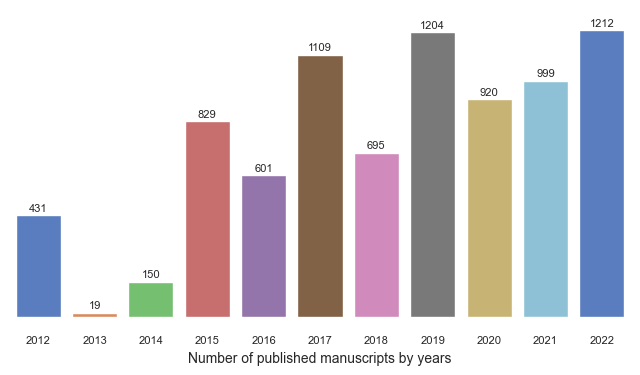

In [335]:
df_pub_years = pd.DataFrame({
    'year': df['year'].dropna().unique(),
    'count': df['year'].value_counts().tolist()
})
df_pub_years = df_pub_years.sort_values(by='year', ascending=True)
tick_val = df_pub_years.year.to_list()

f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="year", y="count", data=df_pub_years,
            label="count", palette=palette)
ax.set(ylim=(0, 1300))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Number of published manuscripts by years", fontsize=10)
p.set_ylabel("",fontsize=10)
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
p.tick_params(labelsize=8)

### Venues of publication

In [336]:
df.venue.isna().sum() # It's good that this does not have any null values

0

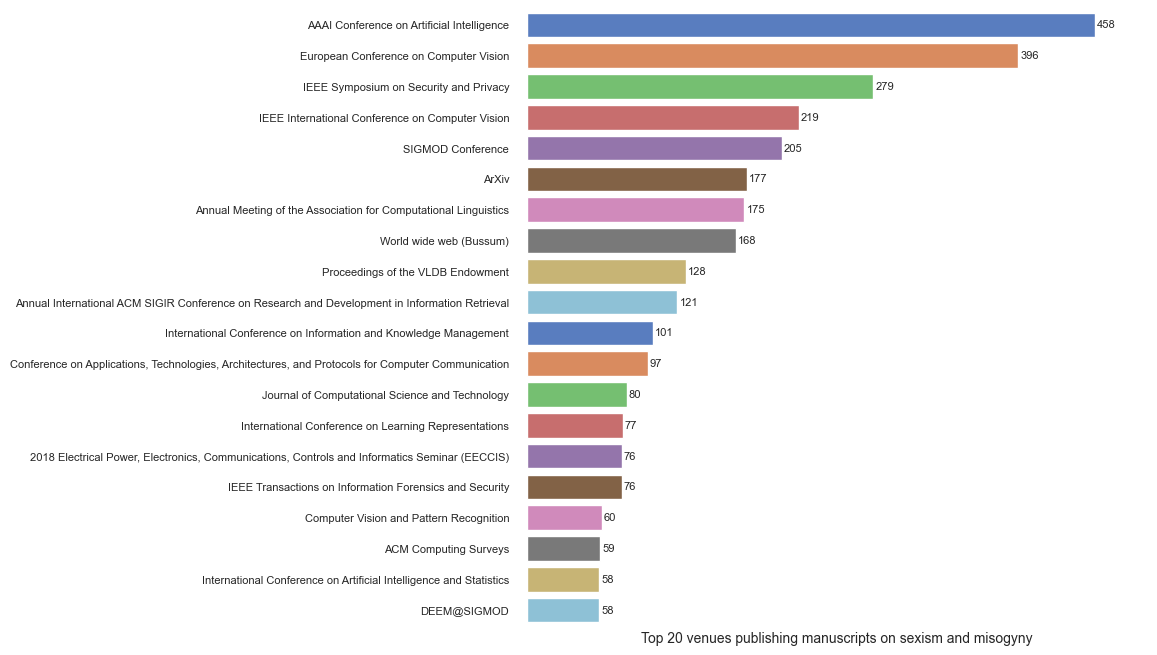

In [337]:
df_pub_venues = pd.DataFrame({
    'venue': df['venue'].dropna().unique(),
    'count': df['venue'].value_counts().tolist()
})
df_pub_venues = df_pub_venues.sort_values(by='count', ascending=False)[:20]
order_list = df_pub_venues.venue.to_list()

f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
p = sns.barplot(data=df_pub_venues, x='count', y='venue', palette=palette, order=order_list)
ax.set(xlim=(0, 500))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 venues publishing manuscripts on sexism and misogyny", fontsize=10)
p.set_ylabel("",fontsize=10)
# disabling yticks by setting yticks to an empty list
plt.xticks([]) 
p.tick_params(labelsize=8)

### Types of publication which are open access or not
But before we get to that, some preprocessing needs to be done. <br>
These are the steps which needs to be done first.
##### Step 1: Add counts of each of the unique publication types

In [338]:
# taking in only the publication types which showed in the string extraction
journal_count = df["type"].str.contains('JournalArticle').sum() #'JournalArticle'
conference_count = df["type"].str.contains('Conference').sum() # 'Conference'
book_count = df["type"].str.contains('Book').sum() # 'Book'
review_count = df["type"].str.contains('Review').sum() # 'Review'
editorial_count = df["type"].str.contains('Editorial').sum() # 'Editorial'
study_count = df["type"].str.contains('Study').sum() # 'Study'
metanalysis_count = df["type"].str.contains('MetaAnalysis').sum() # 'MetaAnalysis'
casereport_count = df["type"].str.contains('CaseReport').sum() # 'CaseReport'
letterscomments_count = df["type"].str.contains('LettersAndComments').sum() # 'LettersAndComments'
dataset_count = df["type"].str.contains('Dataset').sum() # 'Dataset'
clinicaltrial_count = df["type"].str.contains('ClinicalTrial').sum() # 'ClinicalTrial' # it's not present in one of the search reslts


##### Step 2: Create a dataframe with the values and their counts
Create and visualize the dataset to see how many of the types we have in our dataset.

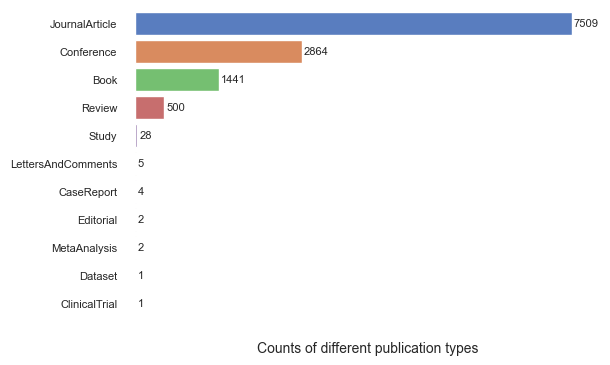

In [339]:
df_pub_counts = pd.DataFrame({'Publication types': unique_pub_type, 
                                       'Counts': [journal_count, conference_count, book_count, review_count,
                                                 editorial_count, study_count, metanalysis_count, casereport_count, 
                                                 letterscomments_count, dataset_count, clinicaltrial_count]}).sort_values(by='Counts', ascending=False) #dataset_count, clinicaltrial_count
                        
f, ax = plt.subplots(figsize=(6, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="Counts", y="Publication types", data=df_pub_counts,
            label="Counts", palette=palette)
ax.set(xlim=(0, 8000))
p.set(xticklabels=[])
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of different publication types", fontsize=10)
p.set_ylabel("",fontsize=8)
p.tick_params(labelsize=8)

But many of those also co-exist with one or more other types of publications. So let's see how. It needs more preprocessing. 

Especially since the 'JournalArticle', 'Conference' and 'Book' are our primary focus, let's see their intersection. In the following steps, let's see the intersection of these three publication types.

In [340]:
# take the index and type column from the dataframe
df_top3_pubs = df[["index", "type"]]

# create columns based on the type values, if present. Just use '1' or any other value to fill it up
# Keeping the rows 0 otherwise, in case conditions don't satisfy
df_top3_pubs['journal'] = np.where(df_top3_pubs["type"].str.contains('JournalArticle'), 1, 0)
df_top3_pubs['conference'] = np.where(df_top3_pubs["type"].str.contains('Conference'), 1, 0)
df_top3_pubs['book'] = np.where(df_top3_pubs["type"].str.contains('Book'), 1, 0)

# view the dataframe
df_top3_pubs

,index,type,journal,conference,book
0,0,"JournalArticle, Conference",1,1,0
1,1,"JournalArticle, Conference",1,1,0
2,2,JournalArticle,1,0,0
3,3,"JournalArticle, Conference",1,1,0
4,4,"JournalArticle, Book, Conference",1,1,1
...,...,...,...,...,...
9895,9895,JournalArticle,1,0,0
9896,9896,"JournalArticle, Book, Conference",1,1,1
9897,9897,"Book, JournalArticle",1,0,1
9898,9898,"JournalArticle, Book, Conference",1,1,1


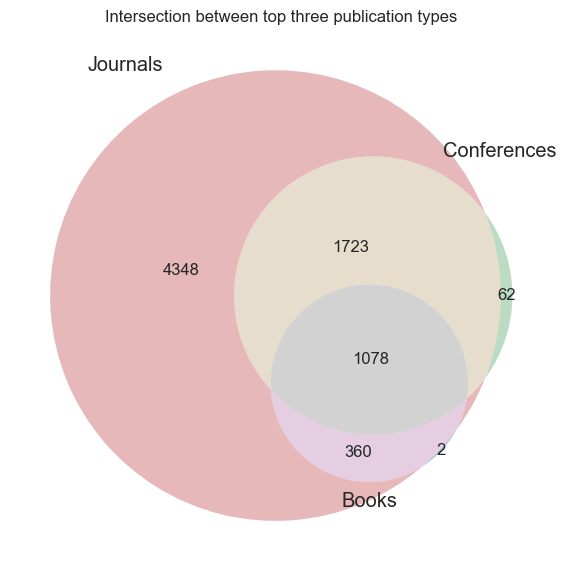

In [341]:
# Choose those indices contained for each publication type
d1 = df_top3_pubs[df_top3_pubs['journal'] == 1].index.tolist() 
d2 = df_top3_pubs[df_top3_pubs['conference'] == 1].index.tolist() 
d3 = df_top3_pubs[df_top3_pubs['book'] == 1].index.tolist() 


# Visualize the intersection through venn diagram
plt.style.use('seaborn')
 
plt.figure(figsize=(7,7))
plt.title("Intersection between top three publication types")

venn3([set(d1), 
       set(d2),
       set(d3)],
       set_labels=('Journals', 'Conferences', 'Books')
     )

plt.show()

### Open access vs non-open access manuscripts
Let us first see with how frequent are the manuscripts with open access publication.
#### Open access publications through time

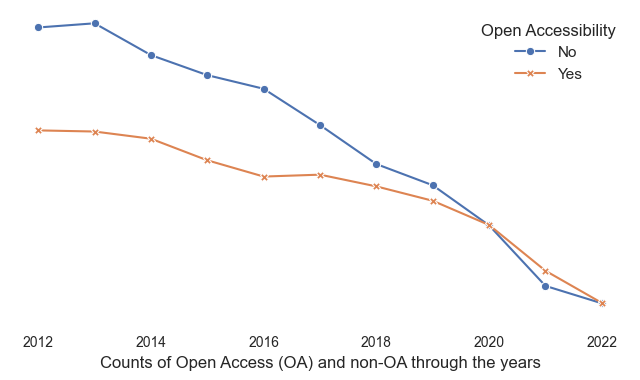

In [345]:
df_mnscr_only_yrs = df[['year', 'isOpenAccess']].groupby(['year'])['isOpenAccess'].value_counts().reset_index(name='total')

f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.lineplot(
    data=df_mnscr_only_yrs,
    x="year", y="total", hue="isOpenAccess", style="isOpenAccess",
    markers=True, dashes=False
)
p.set(yticklabels=[])
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of Open Access (OA) and non-OA through the years", fontsize=12)
p.set_ylabel("",fontsize=8)

plt.legend(title='Open Accessibility', loc='upper right', labels=['No', 'Yes'])
p.tick_params(labelsize=10)

Consistently it is seen that non Open Access manuscripts have dominated over the Open Access ones, untill the year 2020. After 2020, there has been a slight increase in Open Access, with it overtaking non-accessible manuscripts since then.
#### Open access for each type of publication

In [346]:
df_top3pubs_open_access = df[["index", "isOpenAccess", "type"]]

# create columns based on the type values, if present. Just use '1' or any other value to fill it up
# Keeping the rows 0 otherwise, in case conditions don't satisfy
df_top3pubs_open_access['journal'] = np.where(df_top3_pubs["type"].str.contains('JournalArticle'), 1, 0)
df_top3pubs_open_access['conference'] = np.where(df_top3_pubs["type"].str.contains('Conference'), 1, 0)
df_top3pubs_open_access['book'] = np.where(df_top3_pubs["type"].str.contains('Book'), 1, 0)

# Open Access 
oa_journals = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == True) & (df_top3pubs_open_access['journal'] == 1)].index.tolist() 
oa_conferences = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == True) & (df_top3pubs_open_access['conference'] == 1)].index.tolist() 
oa_books = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == True) & (df_top3pubs_open_access['book'] == 1)].index.tolist() 

# Non-open Access 
noa_journals = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == False) & (df_top3pubs_open_access['journal'] == 1)].index.tolist() 
noa_conferences = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == False) & (df_top3pubs_open_access['conference'] == 1)].index.tolist() 
noa_books = df_top3pubs_open_access[(df_top3pubs_open_access['isOpenAccess'] == False) & (df_top3pubs_open_access['book'] == 1)].index.tolist() 

Maybe now we can see the count of each of the 3 types of publication and compare their accessibility.

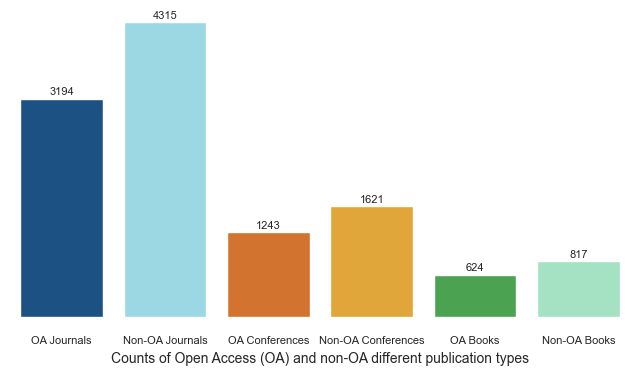

In [347]:
# Counts
oa_journals_count = len(oa_journals)
oa_conferences_count = len(oa_conferences)
oa_books_count = len(oa_books)
noa_journals_count = len(noa_journals)
noa_conferences_count = len(noa_conferences)
noa_books_count = len(noa_books)

# Create an array with the colors you want to use
colors = ['#0B5394', '#90E0EF', '#ED7014', '#FCAE1E', '#3CB043', '#99EDC3']

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

tick_values = ['OA Journals', 'Non-OA Journals', 'OA Conferences', 
                 'Non-OA Conferences', 'OA Books', 'Non-OA Books']

df_oa_counts = pd.DataFrame({'Publication types': tick_values, 
                                       'Counts': [oa_journals_count, noa_journals_count, oa_conferences_count, noa_conferences_count,
                                       oa_books_count, noa_books_count]})
                        
f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="Publication types", y="Counts", data=df_oa_counts,
            label="Publication types", palette=customPalette)
ax.set(ylim=(0, 4500))
p.set(yticklabels=[])
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of Open Access (OA) and non-OA different publication types", fontsize=10)
p.set_ylabel("",fontsize=8)
p.tick_params(labelsize=8)

But of course, because many of them insert among these categories, we can now find the percentage of intersection between the types, based on their accessibility.

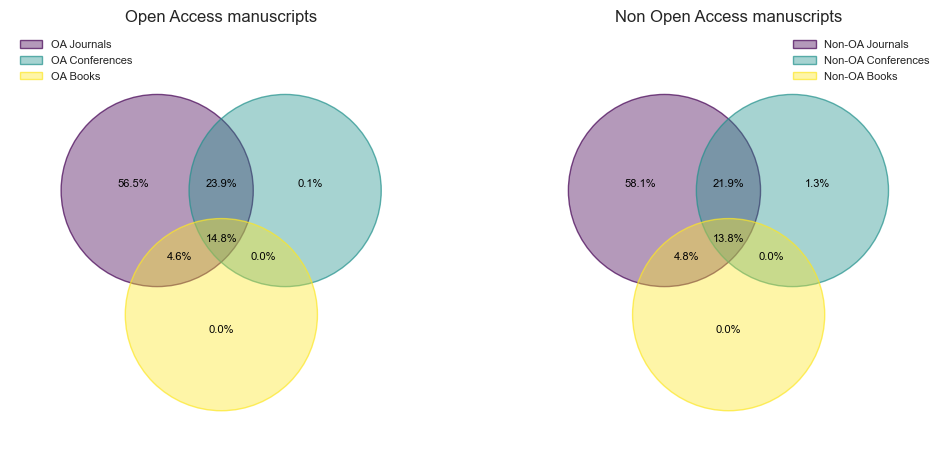

In [348]:
# Venn diagram

_, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
labels = tick_values
letters = iter(labels)

for n_sets, ax in zip(range(1,2), (ax1, ax2)):
    dataset_dict1 = {
        labels[0]: set(oa_journals),
    labels[2]: set(oa_conferences),
    labels[4]: set(oa_books)
    }
    venn(dataset_dict1, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper left", ax=ax1)
    ax1.title.set_text('Open Access manuscripts')
    dataset_dict2 = {
        labels[1]: set(noa_journals),
    labels[3]: set(noa_conferences),
    labels[5]: set(noa_books)
    }
    venn(dataset_dict2, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper right", ax=ax2)
    ax2.title.set_text('Non Open Access manuscripts')


### Preprints 
> "A preprint is a manuscript prepared for publication as a journal article that gets shared prior to peer review by a journal. Publishing preprints enables the immediate sharing of research results so the searcher doesn't have to wait so long to find out about research that's already been done."

This is a common practice in the recent years, especially in the department of Computer Science. Which would make sense to check how much of our dataset is occupied by them.

In [349]:
len(df[df['book_title'] == 'ArXiv'])

175

So quite a few of the manuscripts are in preprints. Let's create some analysis based on that.

But before we create a dataset of the information we could extract from the ArXiv files only.

In [350]:
df_preprint_yrs = df[['index', 'year', 'isOpenAccess', 'fieldsOfStudy', 'book_title', 'status']]

# Select only the ArXiv dataset
df_preprint_yrs = df_preprint_yrs[df_preprint_yrs['book_title'] == 'ArXiv'].drop(columns='book_title')

Let's check the status for each.

In [351]:
df_preprint_yrs.status.unique()

array([nan, 'BRONZE', 'GREEN', 'GOLD', 'HYBRID'], dtype=object)

#### Pre-prints with the number of years

<AxesSubplot:xlabel='year', ylabel='total'>

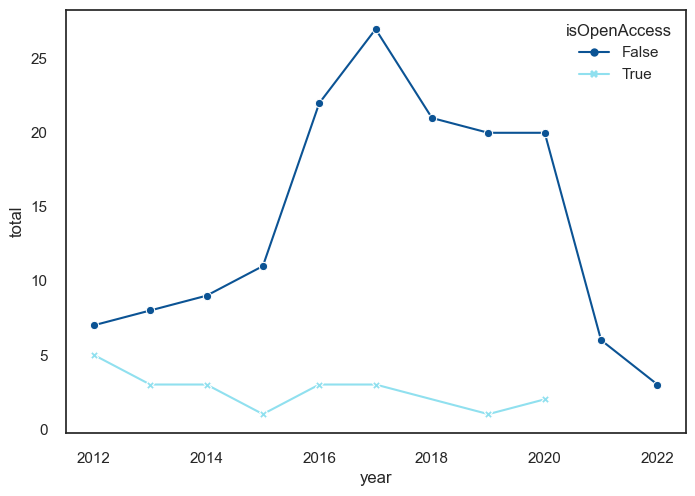

In [352]:
df_preprint_only_yrs = df_preprint_yrs[['year', 'isOpenAccess']].groupby(['year'])['isOpenAccess'].value_counts().reset_index(name='total')

sns.lineplot(
    data=df_preprint_only_yrs,
    x="year", y="total", hue="isOpenAccess", style="isOpenAccess",
    markers=True, dashes=False
)

This plot could be because as a rule, they are non-peer-reviewed versions whose public release primarily serves to expedite the sharing of research findings. Preprints are made freely available to the public on preprint servers, thereby also making an important contribution to green open access.

#### Pre-prints with disciplines

### Disciplines
Similar to the type of publication, some preprocessing needs to be done.

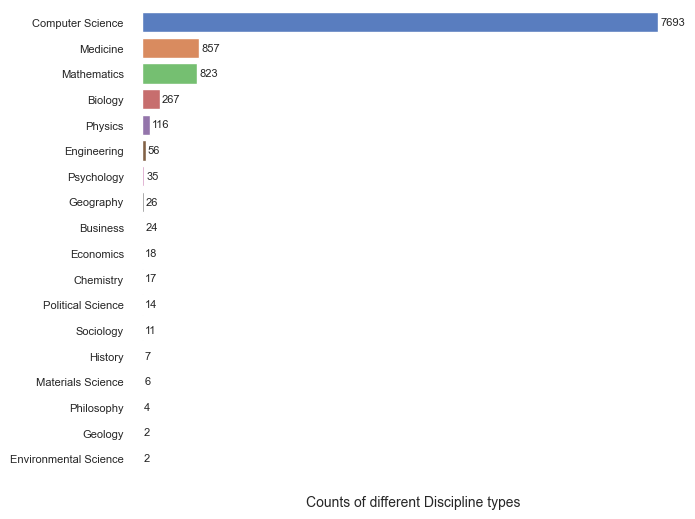

In [353]:
# taking in only the discipline types which showed in the string extraction
cs_count = df["fieldsOfStudy"].str.contains('Computer Science').sum() # 'Computer Science'
maths_count = df["fieldsOfStudy"].str.contains('Mathematics').sum() # 'Mathematics'
med_count = df["fieldsOfStudy"].str.contains('Medicine').sum() # 'Medicine'
phy_count = df["fieldsOfStudy"].str.contains('Physics').sum() # 'Physics'
bio_count = df["fieldsOfStudy"].str.contains('Biology').sum() # 'Biology'
buss_count = df["fieldsOfStudy"].str.contains('Business').sum() # 'Business'
socio_count = df["fieldsOfStudy"].str.contains('Sociology').sum() # 'Sociology'
geo_count = df["fieldsOfStudy"].str.contains('Geography').sum() # 'Geography'
engg_count = df["fieldsOfStudy"].str.contains('Engineering').sum() # 'Engineering'
pscy_count = df["fieldsOfStudy"].str.contains('Psychology').sum() # 'Psychology'
eco_count = df["fieldsOfStudy"].str.contains('Economics').sum() # 'Economics'
chem_count = df["fieldsOfStudy"].str.contains('Chemistry').sum() # 'Chemistry'
ps_count = df["fieldsOfStudy"].str.contains('Political Science').sum() # 'BiolPolitical Scienceogy'
mat_count = df["fieldsOfStudy"].str.contains('Materials Science').sum() # 'Materials Science'
hist_count = df["fieldsOfStudy"].str.contains('History').sum() # 'History'
phil_count = df["fieldsOfStudy"].str.contains('Philosophy').sum() # 'Philosophy'
geolo_count = df["fieldsOfStudy"].str.contains('Geology').sum() # 'Geology'
env_count = df["fieldsOfStudy"].str.contains('Environmental Science').sum() # 'Environmental Science'


df_disc_counts = pd.DataFrame({'Discipline types': unique_fields, 
                                       'Counts': [cs_count, maths_count, med_count, phy_count,
                                       bio_count, buss_count, socio_count, geo_count, engg_count, 
                                       pscy_count, eco_count, chem_count, ps_count, mat_count,
                                       hist_count, phil_count, geolo_count, env_count]}).sort_values(by='Counts', ascending=False) 
                        
f, ax = plt.subplots(figsize=(7, 6))
palette = sns.color_palette("muted")
p = sns.barplot(x="Counts", y="Discipline types", data=df_disc_counts,
            label="Counts", palette=palette)
#ax.set(xlim=(0, 8000))
p.set(xticklabels=[])
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of different Discipline types", fontsize=10)
p.set_ylabel("",fontsize=8)
p.tick_params(labelsize=8)

Interestingly, since we are looking into the occurrence of sexism and misogyny online, so most of the research works seem to fall under Computer Science. 

Let's check with the top 3 disciplines which worked on this.

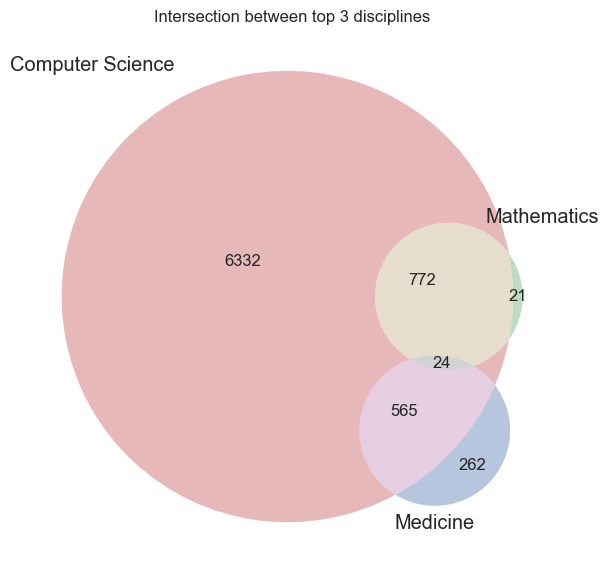

In [354]:
df_disc = df[["index", "fieldsOfStudy"]]

df_disc['Computer Science'] = np.where(df_disc["fieldsOfStudy"].str.contains('Computer Science'), 1, 0)
df_disc['Mathematics'] = np.where(df_disc["fieldsOfStudy"].str.contains('Mathematics'), 1, 0)
df_disc['Medicine'] = np.where(df_disc["fieldsOfStudy"].str.contains('Medicine'), 1, 0)

d4 = df_disc[df_disc['Computer Science'] == 1].index.tolist() 
d5 = df_disc[df_disc['Mathematics'] == 1].index.tolist() 
d6 = df_disc[df_disc['Medicine'] == 1].index.tolist() 

plt.style.use('seaborn')
 
plt.figure(figsize=(7,7))
plt.title("Intersection between top 3 disciplines")

venn3([set(d4), 
       set(d5),
       set(d6)],
       set_labels=('Computer Science', 'Mathematics', 'Medicine')
     )

plt.show()

#### Cleaning the abstracts

Some of the abstracts start with 'ABSTRACT' at the beginning. More so, when the publication type is a 'Review'. So it has to be removed before Topic Modeling is performed on it.

In [355]:
# Remove the abstracts which are at the beginning
def substring_after_abs(s):
    if s is None: # To check if the value is present or not first. Otherwise will give NoneType error
        value = s
    else: # this step only exists if the value in abstract is not null
        abs = re.findall('ABSTRACT ', s) # find the word in the text
        if s.startswith('ABSTRACT '): # only focus on the ones which start with the word
            value = s.partition(abs[0])[2] # in case more than one exist, only consider the part which comes after the first occurrence of the word
        else:
            value = s
    return value

In [356]:
df['revised_abstract'] = df['abstract'].apply(substring_after_abs)

### Platform of interest

In [357]:
platform_lst = ["twitter", "facebook", "reddit", "instagram", "whatsapp",
                    "gab", "2chan", "4chan", "8chan", "youtube", "linkedin", "tumblr", "news", "survey", "wechat", "weibo"]

pattern = '|'.join(r"\b{}\b".format(x) for x in platform_lst)
df["platform"] = df['revised_abstract'].str.findall(pattern, flags=re.I).str.join(', ')
df["platform"].isna().sum() # A lot of them do not have any of the platforms listed above

1552

In [358]:
# Function to remove duplicates
def unique_plat(text):
    if text is None or '':
        value = ''
    else:
        value = ', '.join(set(text.lower().split(', ')))
    return value

df['platform'] = df['platform'].apply(unique_plat)
df['platform'].unique() 

array(['', 'survey', 'twitter', 'instagram', 'news', 'youtube',
       'facebook', 'survey, facebook', 'news, facebook',
       'twitter, facebook', 'whatsapp', 'linkedin, twitter, facebook',
       'linkedin', 'news, twitter', 'survey, twitter, facebook',
       'youtube, news', 'weibo', 'reddit, news',
       'youtube, linkedin, twitter, facebook', 'wechat, facebook',
       'youtube, facebook', 'reddit, twitter', 'instagram, youtube',
       'instagram, news', 'facebook, linkedin'], dtype=object)

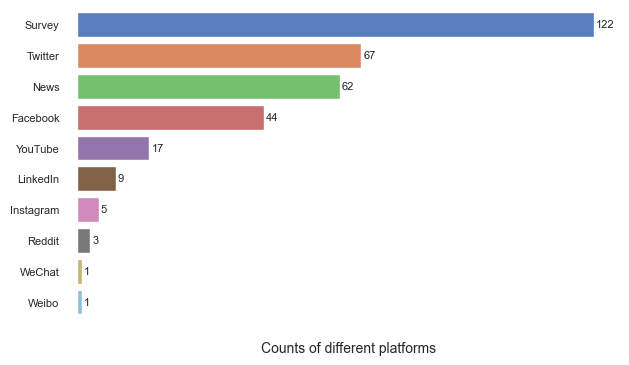

In [361]:
# taking in only the platforms which showed in the string extraction
twitter_count = df["platform"].str.lower().str.contains('twitter').sum()
fb_count = df["platform"].str.lower().str.contains('facebook').sum()
news_count = df["platform"].str.lower().str.contains('news').sum()
survey_count = df["platform"].str.lower().str.contains('survey').sum()
youtube_count = df["platform"].str.lower().str.contains('youtube').sum()
wechat_count = df["platform"].str.lower().str.contains('wechat').sum()
instagram_count = df["platform"].str.lower().str.contains('instagram').sum()
reddit_count = df["platform"].str.lower().str.contains('reddit').sum()
linkedin_count = df["platform"].str.lower().str.contains('linkedin').sum()
weibo_count = df["platform"].str.lower().str.contains('weibo').sum()


df_platform_counts = pd.DataFrame({'Platforms': ['Twitter', 'Facebook', 'News', 'Survey',
                                                                 'YouTube', 'WeChat', 'Instagram', 'Reddit', 'LinkedIn', 'Weibo'], 
                                       'Counts': [twitter_count, fb_count, news_count, survey_count,
                                                 youtube_count, wechat_count, instagram_count, reddit_count, linkedin_count, weibo_count]}).sort_values(by='Counts', ascending=False)

f, ax = plt.subplots(figsize=(7, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="Counts", y="Platforms", data=df_platform_counts,
            label="Counts", palette=palette)
#ax.set(xlim=(0, 150))
p.set(xticklabels=[])
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of different platforms", fontsize=10)

p.set_ylabel("",fontsize=8)
p.tick_params(labelsize=8)

### Co-authorship network

Step 1: Create bigrams of all the combinations of authors in a manuscript. 

In [362]:
# Function for creating the bigrams
def auth_comb(string):
    words= string.split(", ")
    pairs = list(skipgrams(words, n=2, k=len(words)-1))
    return pairs

In [363]:
df['paired_authors'] = df['all_authors'].apply(auth_comb)
#excludes single authors from the list
# as only concerned with multiple pairs

df['paired_authors']

0       [(Yingming Wang, X. Zhang), (Yingming Wang, To...
1       [(Maksym Andriushchenko, Francesco Croce), (Ma...
2                      [(Jianbo Chen, Michael I. Jordan)]
3       [(J. Gao, Chen Sun), (J. Gao, Zhenheng Yang), ...
4       [(Ryan Marcus, Parimarjan Negi), (Ryan Marcus,...
                              ...                        
9895    [(C. Hegde, P. Indyk), (C. Hegde, Ludwig Schmi...
9896    [(P. Pandey, M. A. Bender), (P. Pandey, Rob Jo...
9897    [(Xuejing Liu, Liang Li), (Xuejing Liu, Shuhui...
9898    [(Diptarka Chakraborty, Lior Kamma), (Diptarka...
9899    [(Mario Alviano, Carmine Dodaro), (Mario Alvia...
Name: paired_authors, Length: 8169, dtype: object

In [364]:
# only keeping the rows with NO empty lists

data_paired_auth = df[df['paired_authors'].map(lambda d: len(d)) > 0]

Step 2: Count the occurrence of bigrams in the manuscripts.

In [365]:
auth_term_bigram= data_paired_auth['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams = list(chain.from_iterable(auth_term_bigram))

# Create counter of words in clean bigrams
auth_bigram_counts = collections.Counter(auth_bigrams)

auth_bigram_counts= auth_bigram_counts.most_common(100)
auth_bigram_counts

[(('C. Macdonald', 'I. Ounis'), 19),
 (('C. Lutz', 'F. Wolter'), 17),
 (('Yunjun Gao', 'Gang Chen'), 15),
 (('R. Kontchakov', 'M. Zakharyaschev'), 13),
 (('François Goasdoué', 'I. Manolescu'), 12),
 (('G. Gottlob', 'Andreas Pieris'), 12),
 (('Guoliang Li', 'Jianhua Feng'), 11),
 (('Fei Cai', 'M. de Rijke'), 11),
 (('Paraschos Koutris', 'Dan Suciu'), 11),
 (('Chenyan Xiong', 'Jamie Callan'), 11),
 (('Magdalena Ortiz', 'M. Simkus'), 11),
 (('M. Balazinska', 'Dan Suciu'), 10),
 (('Lei Zou', 'Dongyan Zhao'), 10),
 (('Bhaskar Mitra', 'Nick Craswell'), 9),
 (('E. Kharlamov', 'D. Zheleznyakov'), 9),
 (('Hamed Zamani', 'W. Bruce Croft'), 9),
 (('A. Kemper', 'Thomas Neumann'), 9),
 (('Chao Li', 'G. Miklau'), 9),
 (('D. Delling', 'Renato F. Werneck'), 9),
 (('Ryen W. White', 'E. Horvitz'), 9),
 (('A. Eldawy', 'M. Mokbel'), 9),
 (('S. Bhowmick', 'Byron Choi'), 9),
 (('Anna Shtok', 'Oren Kurland'), 8),
 (('Lisi Chen', 'G. Cong'), 8),
 (('G. Bavota', 'R. Oliveto'), 8),
 (('Muhammad Saleem', 'A. N. 

In [366]:
auth_bigram_counts[0]

(('C. Macdonald', 'I. Ounis'), 19)

In [367]:
type(auth_bigram_counts)

list

In [368]:
#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth = pd.DataFrame(auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth

,auth_bigram,count
0,"(C. Macdonald, I. Ounis)",19
1,"(C. Lutz, F. Wolter)",17
2,"(Yunjun Gao, Gang Chen)",15
3,"(R. Kontchakov, M. Zakharyaschev)",13
4,"(François Goasdoué, I. Manolescu)",12
...,...,...
95,"(Alekh Jindal, Hiren Patel)",6
96,"(Harrisen Scells, G. Zuccon)",6
97,"(Matthias Hagen, Benno Stein)",6
98,"(Ryen W. White, S. Dumais)",6


Step 3: Create a dictionary of the records and plot a network graph based on that.

In [369]:
# Create dictionary of bigrams and their counts
d = data_paired_auth.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

In [370]:
color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

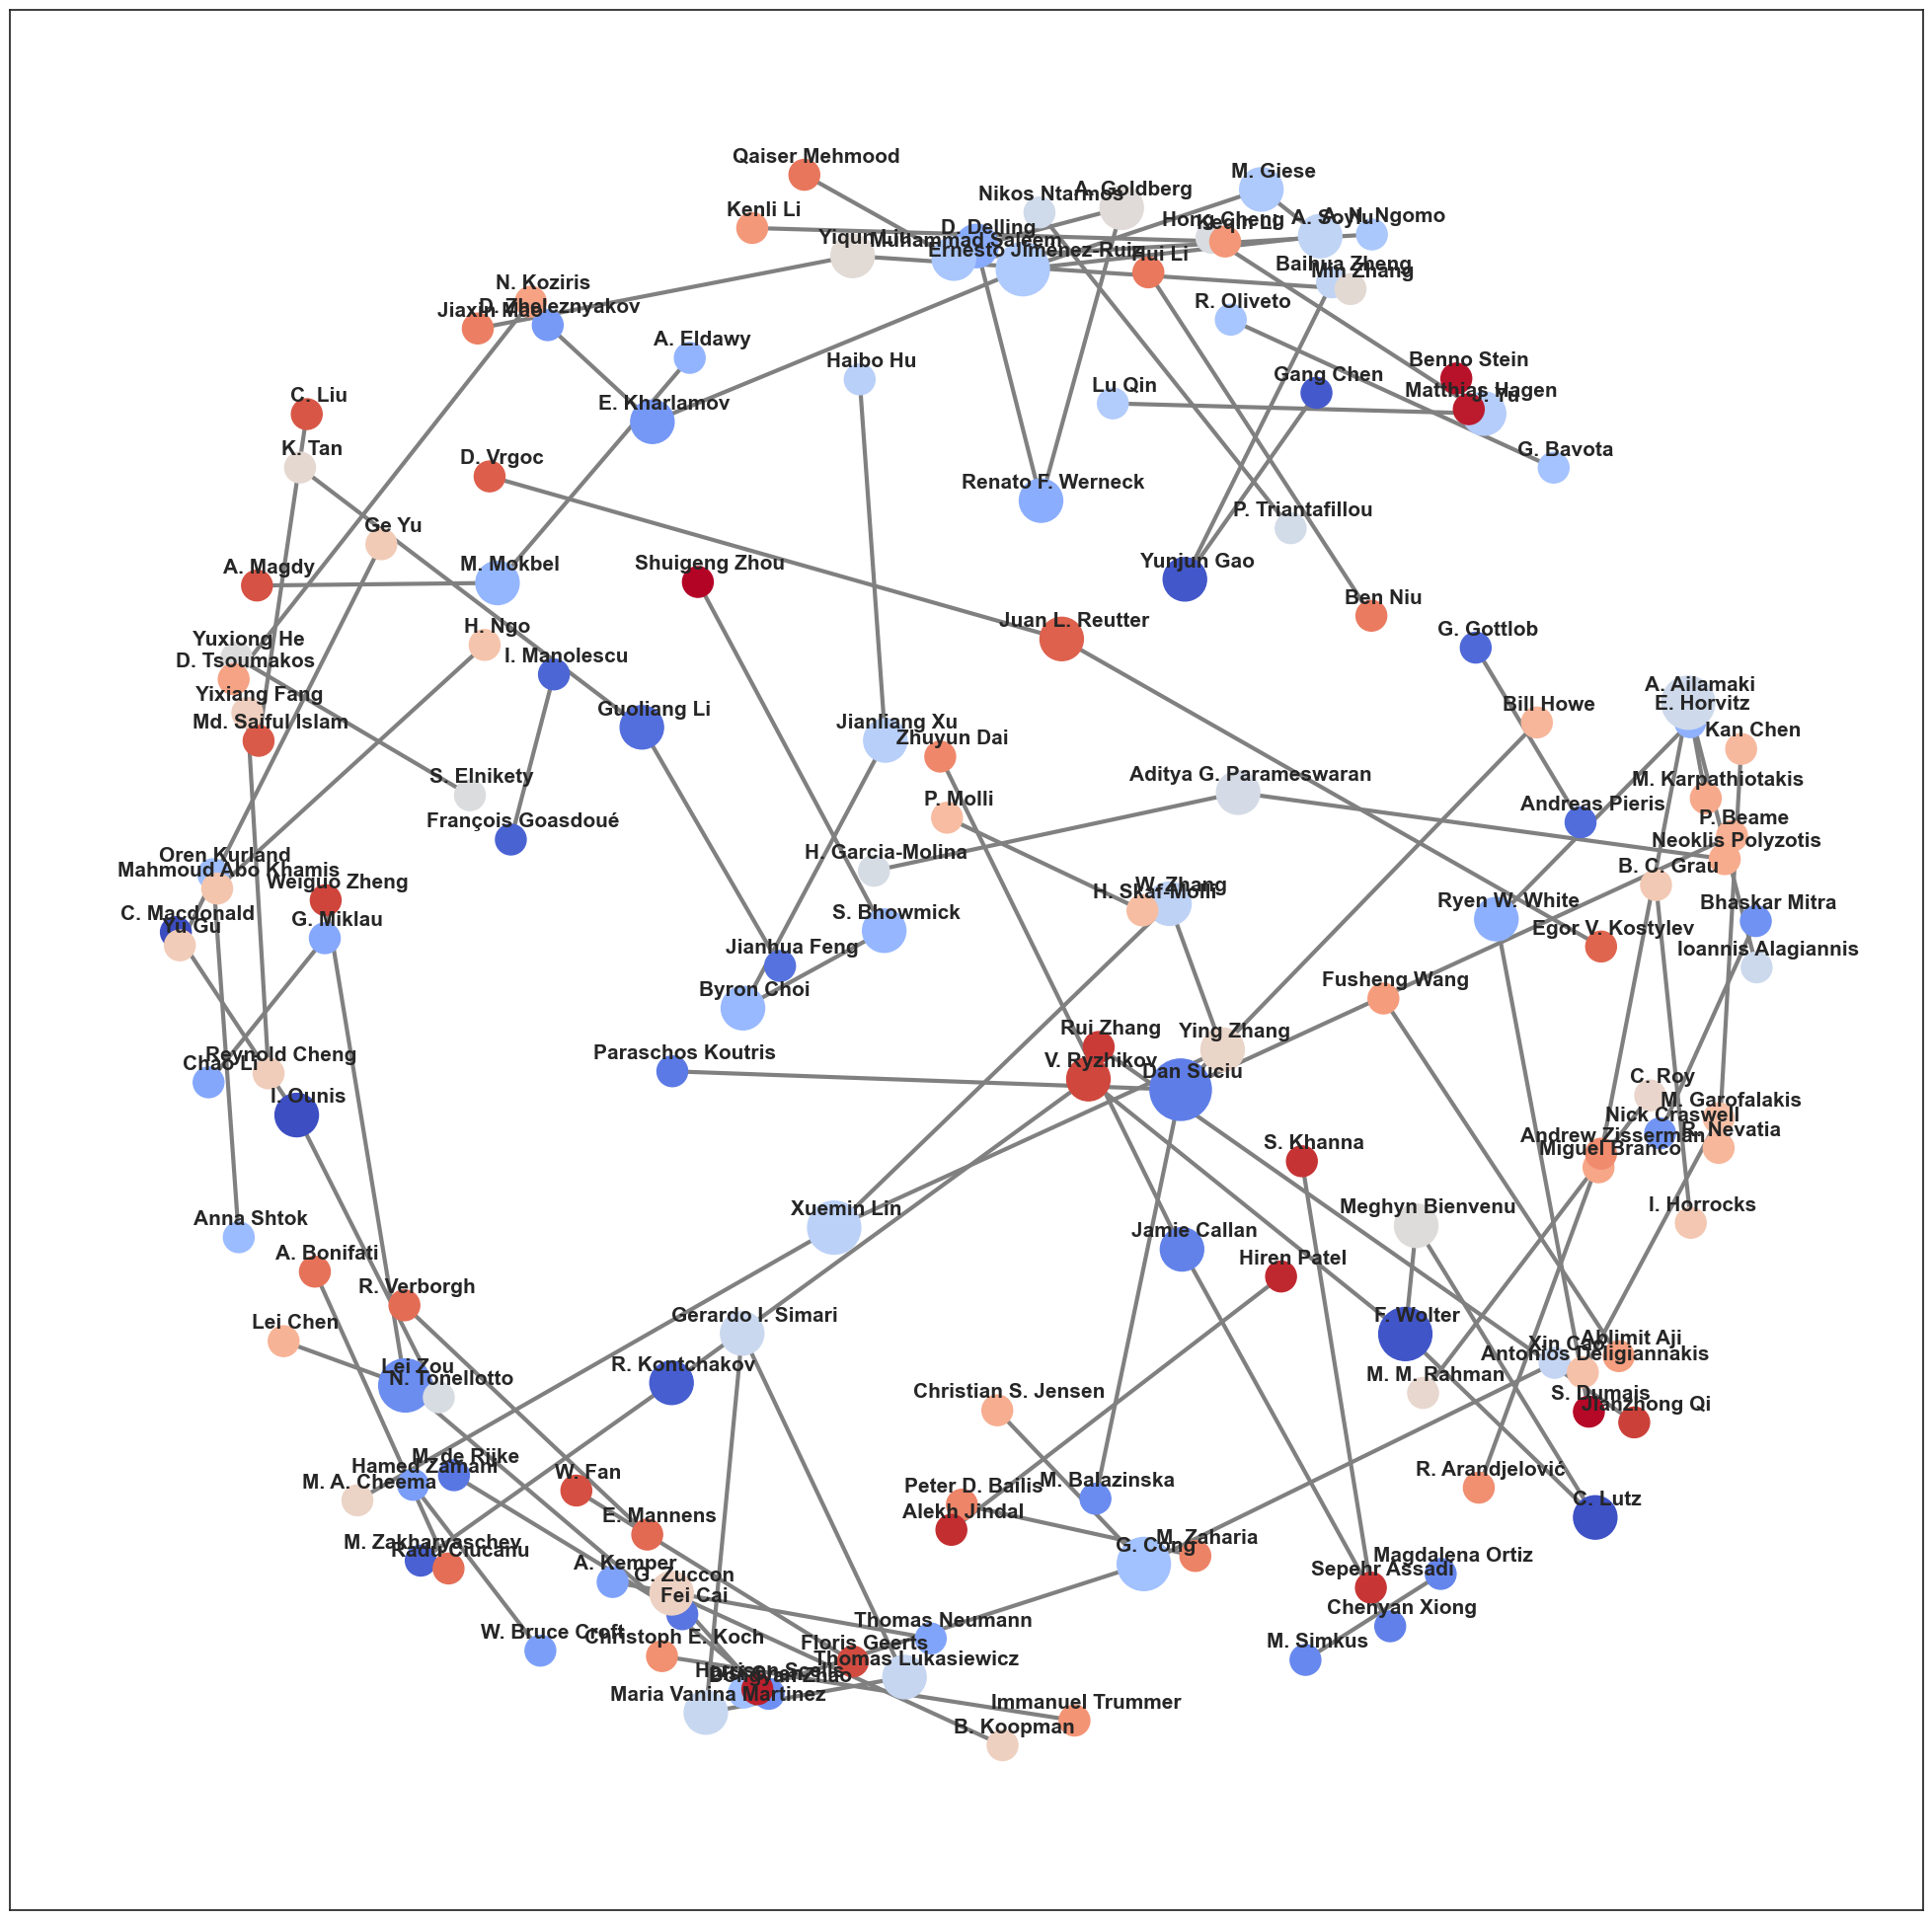

In [371]:
fig, ax = plt.subplots(figsize=(25, 25))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=3,
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 500 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.show()

### Top 50 collaborators and their discipline areas

In [372]:
data_paired_auth.auth_bigram[:50].to_list()

[('C. Macdonald', 'I. Ounis'),
 ('C. Lutz', 'F. Wolter'),
 ('Yunjun Gao', 'Gang Chen'),
 ('R. Kontchakov', 'M. Zakharyaschev'),
 ('François Goasdoué', 'I. Manolescu'),
 ('G. Gottlob', 'Andreas Pieris'),
 ('Guoliang Li', 'Jianhua Feng'),
 ('Fei Cai', 'M. de Rijke'),
 ('Paraschos Koutris', 'Dan Suciu'),
 ('Chenyan Xiong', 'Jamie Callan'),
 ('Magdalena Ortiz', 'M. Simkus'),
 ('M. Balazinska', 'Dan Suciu'),
 ('Lei Zou', 'Dongyan Zhao'),
 ('Bhaskar Mitra', 'Nick Craswell'),
 ('E. Kharlamov', 'D. Zheleznyakov'),
 ('Hamed Zamani', 'W. Bruce Croft'),
 ('A. Kemper', 'Thomas Neumann'),
 ('Chao Li', 'G. Miklau'),
 ('D. Delling', 'Renato F. Werneck'),
 ('Ryen W. White', 'E. Horvitz'),
 ('A. Eldawy', 'M. Mokbel'),
 ('S. Bhowmick', 'Byron Choi'),
 ('Anna Shtok', 'Oren Kurland'),
 ('Lisi Chen', 'G. Cong'),
 ('G. Bavota', 'R. Oliveto'),
 ('Muhammad Saleem', 'A. N. Ngomo'),
 ('M. Giese', 'Ernesto Jiménez-Ruiz'),
 ('Lu Qin', 'J. Yu'),
 ('Jianliang Xu', 'Haibo Hu'),
 ('Xuemin Lin', 'W. Zhang'),
 ('A. Soy

In [373]:
# Function to check if the authors in the list exist in the rows
def check_bigram_auth(tup):
    for i in data_paired_auth:
        if i in tup:
            return 1
        else:
            return 0

df.paired_authors

0       [(Yingming Wang, X. Zhang), (Yingming Wang, To...
1       [(Maksym Andriushchenko, Francesco Croce), (Ma...
2                      [(Jianbo Chen, Michael I. Jordan)]
3       [(J. Gao, Chen Sun), (J. Gao, Zhenheng Yang), ...
4       [(Ryan Marcus, Parimarjan Negi), (Ryan Marcus,...
                              ...                        
9895    [(C. Hegde, P. Indyk), (C. Hegde, Ludwig Schmi...
9896    [(P. Pandey, M. A. Bender), (P. Pandey, Rob Jo...
9897    [(Xuejing Liu, Liang Li), (Xuejing Liu, Shuhui...
9898    [(Diptarka Chakraborty, Lior Kamma), (Diptarka...
9899    [(Mario Alviano, Carmine Dodaro), (Mario Alvia...
Name: paired_authors, Length: 8169, dtype: object

### Disciplines based on the citation count
Let us now see which disciplines have the most citations

In [374]:
df.title.unique()

array(['Anchor DETR: Query Design for Transformer-Based Detector',
       'Square Attack: a query-efficient black-box adversarial attack via random search',
       'HopSkipJumpAttack: A Query-Efficient Decision-Based Attack', ...,
       'Knowledge-guided Pairwise Reconstruction Network for Weakly Supervised Referring Expression Grounding',
       'Tight cell probe bounds for succinct Boolean matrix-vector multiplication',
       'Anytime Computation of Cautious Consequences in Answer Set Programming'],
      dtype=object)